# Mental Representations

In [65]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tools
from tools import *
import importlib
importlib.reload(tools)
import tools
from tools import *

Ultimately, we want to be able to infer how our mind represents things.

Shepard considered the possibility that the mind represents objects as points in a space.

Under this view, the task is to figure out what those points are (using similarity data as a guide).

To understand how this works, let's assume we **already know** what the points for a set of three objects: dog, cat, and wolf. You can think of those "objects" concretely as photographs of individual animals (e.g., a single photo of a dog, etc) that a participant might see in an experiment, or memories of animals they've seen before.

Loaded below are three 2D points that define these three animals.

In [66]:
df_points = load_mental_representation()
df_points

,mind_variable_1,mind_variable_2
dog,0.8,0.7
cat,0.3,0.4
wolf,0.7,0.9


Each 2D object is defined by a set of two values: 
- one for some first variable in your head (`mind_variable_1`), 
- and the other for a second variable in your head (`mind_variable_2`). 

These variables encode some kind of information about the objects.

For example, maybe `mind_variable_1` is a mental scale of "level of animal loyalty to humans" and `mind_variable_2` is a mental scale of "pack behavior". In that case, the values might mean:
- Dog - high loyalty (to owner), strong pack behavior
- Cat - lower loyalty, more solitary
- Wolf - high loyalty (to pack), strongest pack behavior

Because the row indices of the dataframe are strings, we can access the representation (single point) corresponding to each animal using the function below:

In [67]:
def get_point(df, animal):
    return df.loc[animal].values

get_point(df_points, 'dog')

array([0.8, 0.7])

All three points are plotted together in the same 2D space below.

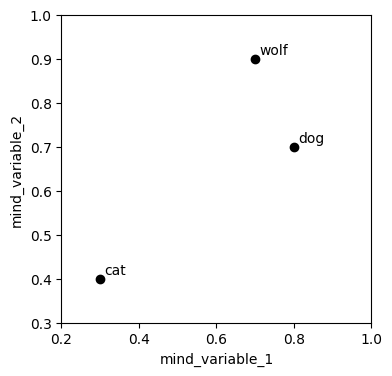

In [68]:
plt.figure(figsize=(4, 4))
for animal in ['dog', 'cat', 'wolf']:
    # each objects is one x and one y
    mind_variable_1, mind_variable_2 = get_point(df_points, animal)
    plt.scatter(mind_variable_1, mind_variable_2, color='black')
    plt.text(mind_variable_1+0.01, mind_variable_2+0.01, animal)
plt.xlabel('mind_variable_1')
plt.ylabel('mind_variable_2')
plt.xlim(0.2, 1)
plt.ylim(0.3, 1)
plt.show()

**Exercise 1**: Just by looking at the plot above, which pair of animals is most "similar"?

In [69]:
# answer1 = 'dog/cat'
# answer1 = 'cat/wolf'
answer1 = 'dog/wolf'

In [70]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if 'w/g'[::-1] in answer1:
    print('Test passed')
else:
    print('Test failed')

Test passed


### Distance in psychological space

In a space, the dissimilarity between objects is naturally represented by distance.

**Exercise 2**: define a function called `euclidean_distance` that takes two points $p$ and $q$ as numpy arrays and returns the euclidean distance between those two points.

The distance formula is given below:

$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}$

In [71]:
# Your code here
def euclidean_distance(p, q):
    return np.sqrt(np.pow(p[0] - q[0], 2)+ np.pow(p[1] - q[1],2))


In [72]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
_ = float(euclidean_distance(np.array([1.1, 3.9]), np.array([0.1, 8])))
if bool(numpy.isclose(_, 4.220189569201838, atol=1e-5)):
    print('Test passed')
else:
    print('Test failed')

Test passed


The below code plots these distances.

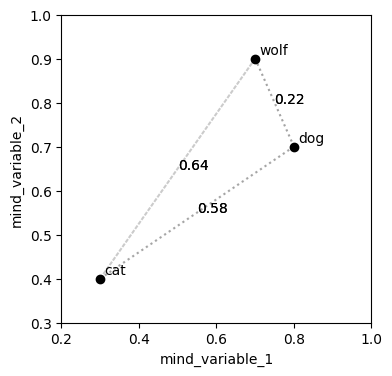

In [73]:
plt.figure(figsize=(4, 4))
for animal in ['dog', 'cat', 'wolf']:
    x, y = get_point(df_points, animal)
    plt.scatter(x, y, color='black')
    plt.text(x+0.01,y+0.01, animal)

# plot distances with labels
for animal1 in ['dog', 'cat', 'wolf']:
    x1, y1 = get_point(df_points, animal1)
    for animal2 in ['dog', 'cat', 'wolf']:
        if animal1 == animal2:
            continue
        x2, y2 = get_point(df_points, animal2)
        plt.plot([x1, x2], [y1, y2], color='black', alpha=0.2, linestyle='dotted')
        plt.text(
            (x1+x2)/2, (y1+y2)/2, 
            f'{euclidean_distance(get_point(df_points, animal1), get_point(df_points, animal2)):.2f}'
        )
plt.xlabel('mind_variable_1')
plt.ylabel('mind_variable_2')
plt.xlim(0.2, 1)
plt.ylim(0.3, 1)
plt.show()

When we don't know the points above (i.e., the psychological representations), all we can do is collect similarity data. We assume there is some kind of approximate correspondence between similarity judgments and distances above.

The below loads similarity data--called a **similarity matrix**--for the three animals.

Similarity values were rated on a scale of 1 to 10 and normalize to the range of 0-1. The data below shows averages across multiple participants.

Note that matching up the "dog" column with the "wolf" row gives us their rated similarity score of 0.51.

In [74]:
df_sim = load_sim_data(points=df_points.values)
df_sim

,dog,cat,wolf
dog,1.000000,0.173898,0.511289
cat,0.173898,1.000000,0.146470
wolf,0.511289,0.146470,1.000000


We want to compare these similarities to the distances between the same object pairs in the 2D psychological representation. To do this, we need to compute all three possible unique distances.

**Exercise 3**: Create a function called `get_pairwise_distances` that takes a dataframe like `df_points` and returns a dataframe like `df_sim` but with distance values instead of similarities. This is called a **distance matrix**.

You can create a dataframe with the proper indices using:
```python
pd.DataFrame(
    index=['dog','cat','wolf'], 
    columns=['dog','cat','wolf']
)
```

And you can set values using `my_df.loc[animal1, animal2] = distance`.

In [75]:
# Your code here

df_sim = pd.DataFrame(
    index=['dog','cat','wolf'], 
    columns=['dog','cat','wolf']
)

def get_pairwise_distances(df):
    distances = pd.DataFrame(index=df.index, columns=df.index)
    for animal1 in df.index:
        point1 = get_point(df, animal1)
        for animal2 in df.index:
            point2 = get_point(df, animal2)
            distances.loc[animal1, animal2] = euclidean_distance(point1, point2)
    return distances
    
    

In [76]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
_ = get_pairwise_distances(df_points)
if np.isclose(_.loc['dog', 'cat'], 0.58309518948453, atol=1e-5):
    print('Test passed')
else:
    print('Test failed')

Test passed


Run the below to see the distance matrix for the animals.

In [77]:
df_dist = get_pairwise_distances(df_points)
df_dist

,dog,cat,wolf
dog,0.0,0.583095,0.223607
cat,0.583095,0.0,0.640312
wolf,0.223607,0.640312,0.0


Both our similarity and distance matrices are redundant in that the upper "triangle" is a reflection of the lower triangle. That is, the value for dog-cat is the same as the one for cat-dog. The diagonal elements are also fixed and not informative (1 for similarity, 0 for distance).

**Exercise 4**: Create a function called `flatten_lower_triangle` that takes either a similarity or distance matrix dataframe like the above and returns a 1-dimensional array of the values in the lower triangle. Extract the items by column, such that the output order for the animal distance matrix should be `[dog-cat, dog-wolf, cat-wolf]`.

You can use `my_df.values` to extract the raw numpy matrix of values from the dataframe.

In [78]:
# Your code here
def flatten_lower_triangle(matrix):
    if type(matrix) == pd.DataFrame:
        matrix = matrix.values
    flat = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i > j:
                flat.append(matrix[i, j])
    return np.array(flat)


In [79]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
_ = flatten_lower_triangle(df_sim)
if np.isclose(_[1], 0.5112889476777815, atol=1e-5):
    print('Test passed')
else:
    print('Test failed')

Test failed


Below this function is applied to get the three unique similarity and distance values for each matrix.

In [80]:
print("[dog-cat, dog-wolf, cat-wolf]")

similarities = flatten_lower_triangle(df_sim)
print('Similarities', similarities)

distances = flatten_lower_triangle(df_dist)
print('Distances', distances)

[dog-cat, dog-wolf, cat-wolf]
Similarities [nan nan nan]
Distances [0.58309519 0.2236068  0.64031242]


The below plots distance against similarities so we can see how they are related. Take a look at the result.

(0.1, 0.55)

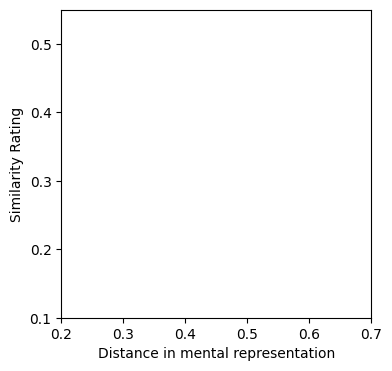

In [81]:
plt.figure(figsize=(4, 4))
# plot the distances against similarities
plt.scatter(distances, similarities, color='red')
# plot the best fitting line too
m, b = np.polyfit(distances, similarities, 1)
x_line = np.linspace(0, 1.0, 100)
plt.plot(x_line, m*x_line + b, 'k--', alpha=0.4)
plt.xlabel('Distance in mental representation')
plt.ylabel('Similarity Rating')
plt.xlim(0.2, 0.7)
plt.ylim(0.1, 0.55)

The plot shows that similarity is decreasing with distance in the mental representation as we expect.

The trend appears to follow a negatively sloped line, but it's hard to tell given only three points.

Shepard predicts that a decreasing exponential function $e^{-distance}$ will better describe the relationship. A more general form of this function is $e^{-\alpha \times distance}$, where $\alpha$ is a slope parameter that controls the shape of the exponential curve.

**Exercise 5**: Create a function called `sheps_exp` that takes in a numeric argument `alpha` and a numpy array of distances and returns similarities.

In [82]:
# Your code here



In [83]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
_ = sheps_exp(0.1, distances)
if np.isclose(_[1], 0.97788747, atol=1e-5):
    print('Test passed')
else:
    print('Test failed')

NameError: name 'sheps_exp' is not defined

**Exercise 6**: Change the value of `alpha` in the below cell and re-run the cell until the resulting plot shows the best possible fit of the curve to the similarity data.

In [ ]:
# set your alpha here:
alpha = 1.0

# DON'T CHANGE THE BELOW
plt.figure(figsize=(4, 4))
plt.scatter(distances, similarities, color='red')
curve_range = np.linspace(0.2, 0.7, 100)
plt.plot(curve_range, np.exp(-alpha*np.linspace(0.2, 0.7, 100)) , 'k--')
plt.ylim(np.exp(-alpha*curve_range).min(), np.exp(-alpha*curve_range).max())
plt.xlabel('Distance in mental representation')
plt.ylabel('Similarity Rating')
plt.xlim(0.2, 0.7)
plt.ylim(0.1, 0.55)

In [ ]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(alpha, float("0.3"[::-1]), atol=0.1):
    print('Test passed')
else:
    print('Test failed')

The above shows that's Shepard's function perfectly fits the similarity data.

In the case of this data, $similarity = e^{-3 \times distance}$.

**Exercise 6**: Use basic algebra to isolate $distance$ in the equation above. Note that the inverse of an exp function is a log function. Uncomment your answer below.

In [ ]:
# answer2 = "distance = exp(similarity) / 3"
# answer2 = "distance = 3*log(exp(similarity))"
answer2 = "distance = -(log similarity) / 3"

In [ ]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if "(-"[::-1] in answer2:
    print('Test passed')
else:
    print('Test failed')

Test passed


This new equation is important. It means that if we didn't know the psychological distances in the first place, and we usually don't, we'd have to find a set of points such that the distances between them were proportional to $-log(similarity)$, or in other words, negatively correlated with $log(similarity)$.

You will learn more about how to do this in your next homework.

For now, we will take a simple approach.

**Exercise 7**:

The below code randomly assigns points to each animal, which are then visualized. The title of the plot shows the correlation between distances for the random points and $log(similarity)$.

Run the cell until the correlation value indicates that we've stumbled across a very good approximation of the original psychological representation. Then stop and run the test cell.

In [ ]:
df_rnd_points = create_random_points()

df_rnd_dist = get_pairwise_distances(df_rnd_points)
rnd_distances = flatten_lower_triangle(df_rnd_dist)

# compute correlation with -log similarity
log_sim = np.log(similarities)
r = np.corrcoef(rnd_distances, log_sim)[0, 1]

plt.figure(figsize=(4, 4))
plt.title(f'Correlation: {r:.2f}')
for animal in ['dog', 'cat', 'wolf']:
    mind_variable_1, mind_variable_2 = get_point(df_rnd_points, animal)
    plt.scatter(mind_variable_1, mind_variable_2, color='black')
    plt.text(mind_variable_1+0.01, mind_variable_2+0.01, animal)
plt.xlabel('mind_variable_1')
plt.ylabel('mind_variable_2')
plt.show()

In [ ]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(r, -1, atol=0.1):
    print('Test passed')
else:
    print('Test failed')